0	23.3643841172
1	22.0234912793
2	20.7021257544
3	19.4365383052
4	18.6028243383
5	17.8197817978
6	17.2254124769
7	16.8932649788
8	16.5676208338
9	16.248351689
10	15.9353317351
11	15.6284376558
12	15.0878241949
13	14.5147668296
14	14.2343399731
15	13.6360709519
16	13.1497282353
17	12.7461342254
18	12.3074640056
19	12.067626544
20	11.8325110371
21	11.4455800507
22	11.1310332861
23	10.7767665736
24	10.4658767205
25	10.2603914765
26	10.0134128497
27	9.81661244389
28	9.59161852417
29	9.38031067367
30	9.18377690261
31	9.00031893364
32	8.82476891295
33	8.66811673095
34	8.52151851408
35	8.38822659029
36	8.24824645292
37	8.11026108285
38	7.91829815934
39	7.79115950057
40	7.6394450014
41	7.51456539496
42	7.41015918759
43	7.31360503595
44	7.19253029112
45	7.01160801227
46	6.89438266491
47	6.81378965572
48	6.71584899899
49	6.58707683855
50	6.49584762431
51	6.37541456848
52	6.25238692038
53	6.09020595874
54	6.01525794858
55	5.8096784249
56	5.73327564726
57	5.64102735439
58	5.5476425802
59	5.4417571

70	0.726571440882
71	1.17621512513
72	0.894709912613
73	0.822792687083
74	1.24364655722
75	0.935801831425
76	1.2208316081
77	1.02359373117
78	0.833403609589
79	0.899596222983
80	0.732204869386
81	0.863858212691
82	0.707029735164
83	0.844224522364
84	0.658958203086
85	1.60970910152
86	1.0152716882
87	1.37123517003
88	1.27586948995
89	0.862149998415
90	1.00595538192
91	1.45735113419
92	1.10670314673
93	1.0406822731
94	0.728827707727
95	1.4369730026
96	1.13352808461
97	1.00713550329
98	1.38182845994
99	1.66028571401
100	1.19058022736
101	0.869401073473
102	1.28521789182
103	1.02381946462
104	0.824692659007
105	0.749944098499
106	1.22938347023
107	0.83874657821
108	0.726080131085
109	1.38947346131
110	1.15712367898
111	0.760989578275
112	0.811001138862
113	1.1436237662
114	1.39709945167
115	1.80295774441
116	1.39921495813
117	0.978108562194
118	1.35450738405
119	1.19351818845
120	0.939884620369
121	0.935737876779
122	1.21267773737
123	0.746651743096
124	1.3421247597
125	0.980758257971
126	

132	0.449570559355
133	0.476277823793
134	0.531515374355
135	0.578944126675
136	0.647072934837
137	0.74354159858
138	0.831568165773
139	0.841432632279
140	0.852288393394
141	0.865207461877
142	0.883422409215
143	0.799010291203
144	0.73377325571
145	0.682632312931
146	0.655344420481
147	0.627571595913
148	0.625866454041
149	0.648091397472
150	0.687064628169
151	0.728027633325
152	0.78770890821
153	0.838896024667
154	0.79637557179
155	0.754834878859
156	0.736476584701
157	0.730286966533
158	0.718826813701
159	0.719925209277
160	0.732810317063
161	0.7605980743
162	0.787989046976
163	0.817377313791
164	0.776402681323
165	0.737258896607
166	0.722737689454
167	0.721380868697
168	0.720074127602
169	0.72402102166
170	0.738162899205
171	0.760659428769
172	0.71474434135
173	0.674842463784
174	0.578801380089
175	0.516309200262
176	0.482297545499
177	0.464946742589
178	0.463064503764
179	0.479339790667
180	0.468100757729
181	0.479714794579
182	0.501903227456
183	0.494326079608
184	0.479467612012
1

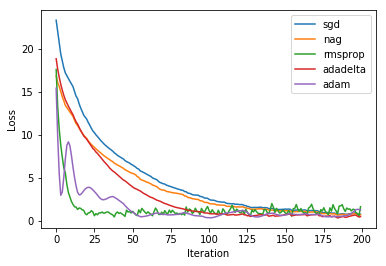

In [1]:
from sklearn import datasets as ds
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


def train(x_train, y_train, x_test, y_test, method, iters, test_errors):
    max_iterations = 200
    theta = random.rand(num_features + 1)
    gamma = 1
    num_test_samples, num_test_features = x_test.shape

    if method == 'sgd':
        lr = 0.01

        for i in range(max_iterations):
            output = np.dot(x_train[i], theta)
            grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + gamma * theta
            theta = theta - lr * grad

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], theta)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * gamma * np.dot(theta, theta)
            print(str(i) + '\t' + str(predict_error / num_test_samples))

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'nag':
        lr = 0.01
        miu = 0.9
        momentum = np.zeros(num_features + 1)

        for i in range(max_iterations):
            output = np.dot(x_train[i], theta - lr * miu * momentum)
            grad = grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + gamma * theta
            momentum = momentum * lr + grad
            theta = theta - lr * momentum

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], theta)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * gamma * np.dot(theta, theta)
            print(str(i) + '\t' + str(predict_error / num_test_samples))

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'rmsprop':
        lr = 0.1
        expectation = 1
        rho = 0.95
        delta = 10e-7

        for i in range(max_iterations):
            output = np.dot(x_train[i], theta)
            grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + gamma * theta
            norm = grad * grad
            expectation = rho * expectation + (1 - rho) * norm
            theta = theta - lr * grad / (np.sqrt(expectation) + delta)

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], theta)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * gamma * np.dot(theta, theta)
            print(str(i) + '\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'adam':
        delta = 10e-8
        rho1 = 0.9
        rho2 = 0.999
        lr = 0.1
        s = 0
        r = 0

        for i in range(max_iterations):
            output = np.dot(x_train[i], theta)
            grad = grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + gamma * theta

            s = rho1 * s + (1 - rho1) * grad
            r = rho2 * r + (1 - rho2) * grad * grad
            s_hat = s / (1 - rho1)
            r_hat = r / (1 - rho2)
            delta_theta = (-lr * s_hat) / (np.sqrt(r_hat) + delta)
            theta = theta + delta_theta

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], theta)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * gamma * np.dot(theta, theta)
            print(str(i) + '\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

    if method == 'adadelta':
        r = 0
        e = 0
        miu = 0.9
        delta = 10e-7
        lr = 10

        for i in range(max_iterations):
            output = np.dot(x_train[i], theta)
            grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + gamma * theta

            r = miu * r + (1 - miu) * grad * grad
            delta_theta = (-lr * grad * np.sqrt(e + delta)) / (np.sqrt(r + delta))
            theta = theta + delta_theta
            e = miu * e + (1 - miu) * e * e


            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], theta)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * gamma * np.dot(theta, theta)
            print(str(i) + '\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

if __name__ == '__main__':
    x_train, y_train = ds.load_svmlight_file('./data/a9a')
    x_test, y_test = ds.load_svmlight_file('./data/a9a.t')

    num_samples, num_features = x_train.shape
    num_test_samples, num_test_features = x_test.shape

    x_train = x_train.toarray()
    temp = np.ones(shape=[32561, 1], dtype=np.float32)
    x_train = np.concatenate([x_train, temp], axis=1)
    x_test = x_test.toarray()
    temp = np.zeros(shape=[16281, 1], dtype=np.float32)
    temp1 = np.ones(shape=[16281, 1], dtype=np.float32)
    x_test = np.concatenate([x_test, temp, temp1], axis=1)


    methods = ['sgd', 'nag', 'rmsprop', 'adadelta', 'adam']
    for method in methods:
        iters = []
        test_errors = []
        train(x_train, y_train, x_test, y_test, method, iters, test_errors)
        plt.plot(iters, test_errors, label=method)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()